# Exploratory Data Analysis

Dataset Source: https://www.kaggle.com/code/kellibelcher/hr-analytics-and-prediction-of-employee-attrition/notebook



In [1]:
import sys
sys.path.insert(0, '..')

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from pathlib import Path

# Set Seaborn style
sns.set_theme(style='darkgrid')
sns.set_context('notebook')

# Data directory
DATA_DIR = Path('../data/own_data')

print("Setup complete!")

Setup complete!


In [2]:
# Load kaggle dataset
kaggle = pd.read_csv(DATA_DIR / 'kaggle_kellybelcher.csv')

# Display dataset overview as table
dataset_info = pd.DataFrame({
    'Dataset': ['kaggle_kellybelcher.csv'],
    'Count': [len(kaggle)]
})
display(dataset_info)

,Dataset,Count
0,kaggle_kellybelcher.csv,1470


In [3]:
kaggle.shape

(1470, 35)

In [4]:
kaggle.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
kaggle.info()

<class 'pandas.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   str  
 2   BusinessTravel            1470 non-null   str  
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   str  
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   str  
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   str  
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null   int64
 15

In [6]:
# Create new dataframe with selected columns
kaggle_subset = kaggle[['Age', 'Department', 'JobLevel', 'JobRole']].copy()

# Map JobLevel (1-5) to seniority labels
seniority_mapping = {
    1: 'Junior',
    2: 'Mid level',
    3: 'Senior',
    4: 'Lead',
    5: 'Executive'
}
kaggle_subset['JobLevel'] = kaggle_subset['JobLevel'].map(seniority_mapping)

print(f"New dataframe shape: {kaggle_subset.shape}")
display(kaggle_subset.head())


New dataframe shape: (1470, 4)


,Age,Department,JobLevel,JobRole
0,41,Sales,Mid level,Sales Executive
1,49,Research & Development,Mid level,Research Scientist
2,37,Research & Development,Junior,Laboratory Technician
3,33,Research & Development,Junior,Research Scientist
4,27,Research & Development,Junior,Laboratory Technician


In [7]:
# Display missing values, their percentage, and unique value counts for each column
combined_info = pd.DataFrame({
    "Missing Values": kaggle_subset.isnull().sum(),
    "Missing (%)": (kaggle_subset.isnull().sum() / len(kaggle) * 100).round(2),
    "Unique Values": kaggle_subset.nunique()
})

display(combined_info)

,Missing Values,Missing (%),Unique Values
Age,0,0.0,43
Department,0,0.0,3
JobLevel,0,0.0,5
JobRole,0,0.0,9


In [8]:
# Check for duplicate rows in the dataset
duplicate_info = pd.DataFrame({
    "Metric": ["Duplicate Rows"],
    "Count": [kaggle_subset.duplicated().sum()]
})
display(duplicate_info)

,Metric,Count
0,Duplicate Rows,967


In [9]:
# Department distribution
dept_counts = kaggle_subset['Department'].value_counts()
dept_percentages = (dept_counts / dept_counts.sum() * 100).round(1)

dept_table = pd.DataFrame({
    'Department': dept_counts.index,
    'Count': dept_counts.values,
    'Percentage (%)': dept_percentages.values
})

print(f"Unique departments: {len(dept_counts)}\n")
print("Department Distribution:")
display(dept_table)

Unique departments: 3

Department Distribution:


,Department,Count,Percentage (%)
0,Research & Development,961,65.4
1,Sales,446,30.3
2,Human Resources,63,4.3


In [10]:
# Seniority distribution
seniority_counts = kaggle_subset['JobLevel'].value_counts()
seniority_percentages = (seniority_counts / seniority_counts.sum() * 100).round(1)

seniority_table = pd.DataFrame({
    'Seniority': seniority_counts.index,
    'Count': seniority_counts.values,
    'Percentage (%)': seniority_percentages.values
})

print(f"Unique seniority levels: {len(seniority_counts)}\n")
print("Seniority Distribution:")
display(seniority_table)

Unique seniority levels: 5

Seniority Distribution:


,Seniority,Count,Percentage (%)
0,Junior,543,36.9
1,Mid level,534,36.3
2,Senior,218,14.8
3,Lead,106,7.2
4,Executive,69,4.7


In [11]:
kaggle_subset.head(30)

,Age,Department,JobLevel,JobRole
0,41,Sales,Mid level,Sales Executive
1,49,Research & Development,Mid level,Research Scientist
2,37,Research & Development,Junior,Laboratory Technician
3,33,Research & Development,Junior,Research Scientist
4,27,Research & Development,Junior,Laboratory Technician
5,32,Research & Development,Junior,Laboratory Technician
6,59,Research & Development,Junior,Laboratory Technician
7,30,Research & Development,Junior,Laboratory Technician
8,38,Research & Development,Senior,Manufacturing Director
9,36,Research & Development,Mid level,Healthcare Representative


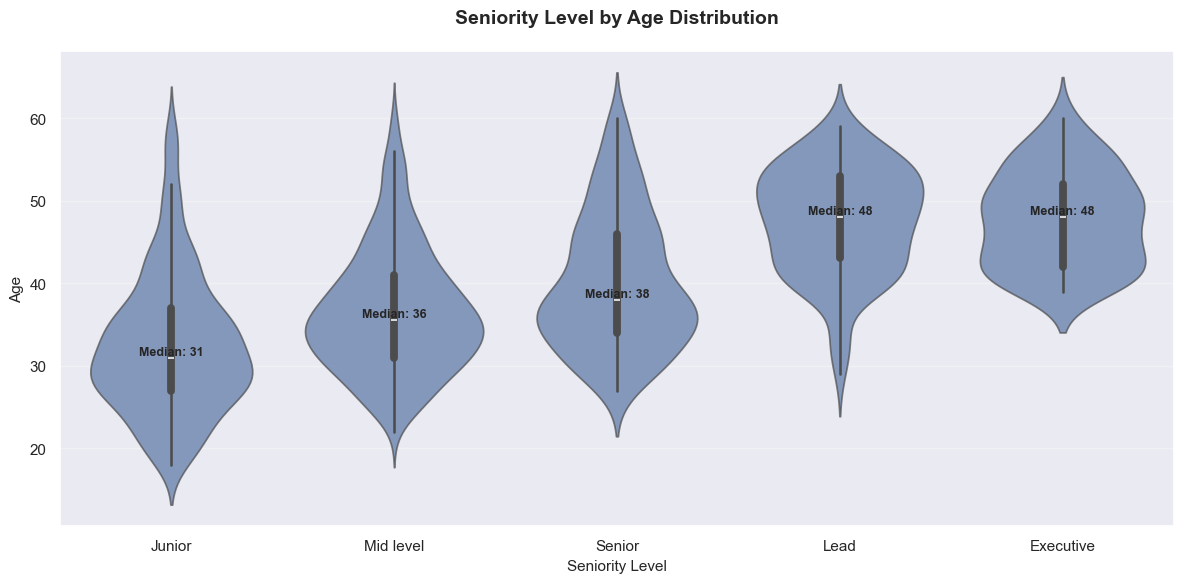


Age Statistics by Seniority Level:


,Seniority Level,Count,Mean Age,Median Age,Min Age,Max Age
0,Junior,543,32.5,31.0,18,59
1,Mid level,534,36.6,35.5,22,60
2,Senior,218,40.1,38.0,27,60
3,Lead,106,47.5,48.0,29,59
4,Executive,69,47.8,48.0,39,60


In [12]:
# Seniority Progression by Age
plt.figure(figsize=(12, 6))

# Define seniority order for proper plotting
seniority_order = ['Junior', 'Mid level', 'Senior', 'Lead', 'Executive']

# Create a violin plot showing age distribution per seniority level
sns.violinplot(data=kaggle_subset, x='JobLevel', y='Age', order=seniority_order, alpha=0.7)
plt.title('Seniority Level by Age Distribution', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Seniority Level', fontsize=11)
plt.ylabel('Age', fontsize=11)
plt.grid(axis='y', alpha=0.3)

# Add summary statistics
for i, seniority in enumerate(seniority_order):
    age_data = kaggle_subset[kaggle_subset['JobLevel'] == seniority]['Age']
    median_age = age_data.median()
    plt.text(i, median_age, f'Median: {median_age:.0f}', 
            ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Create statistics table
age_stats = []
for seniority in seniority_order:
    age_data = kaggle_subset[kaggle_subset['JobLevel'] == seniority]['Age']
    age_stats.append({
        'Seniority Level': seniority,
        'Count': len(age_data),
        'Mean Age': f"{age_data.mean():.1f}",
        'Median Age': f"{age_data.median():.1f}",
        'Min Age': age_data.min(),
        'Max Age': age_data.max()
    })

age_stats_df = pd.DataFrame(age_stats)
print("\nAge Statistics by Seniority Level:")
display(age_stats_df)

## Conclusion

Although the dataset contains a relatively large number of employee records, it covers only a small set of departments and highly standardized job roles. 
Consequently, it is not suitable for constructing or extending lookup tables for job title based classification. 
In addition, the limited diversity of job titles would lead to ambiguous mappings, as identical correspond to different departments and/or seniority levels.

However, the analysis of seniority progression by age confirms the pattern observed in the EDA of the annotated data: seniority levels tend to increase over the course of a career. 
The age distribution across seniority levels shows a clear upward trend, with higher seniority levels associated with older age groups.
